![](../JFM-notebooks-logo.jpg)

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean

# Aesthetics
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper')
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='serif')

In [2]:
Tplanes = []
with h5py.File('Tplanes.h5','r') as f:
    for grp in f.__iter__():
        Tplanes.append(f[grp][()])

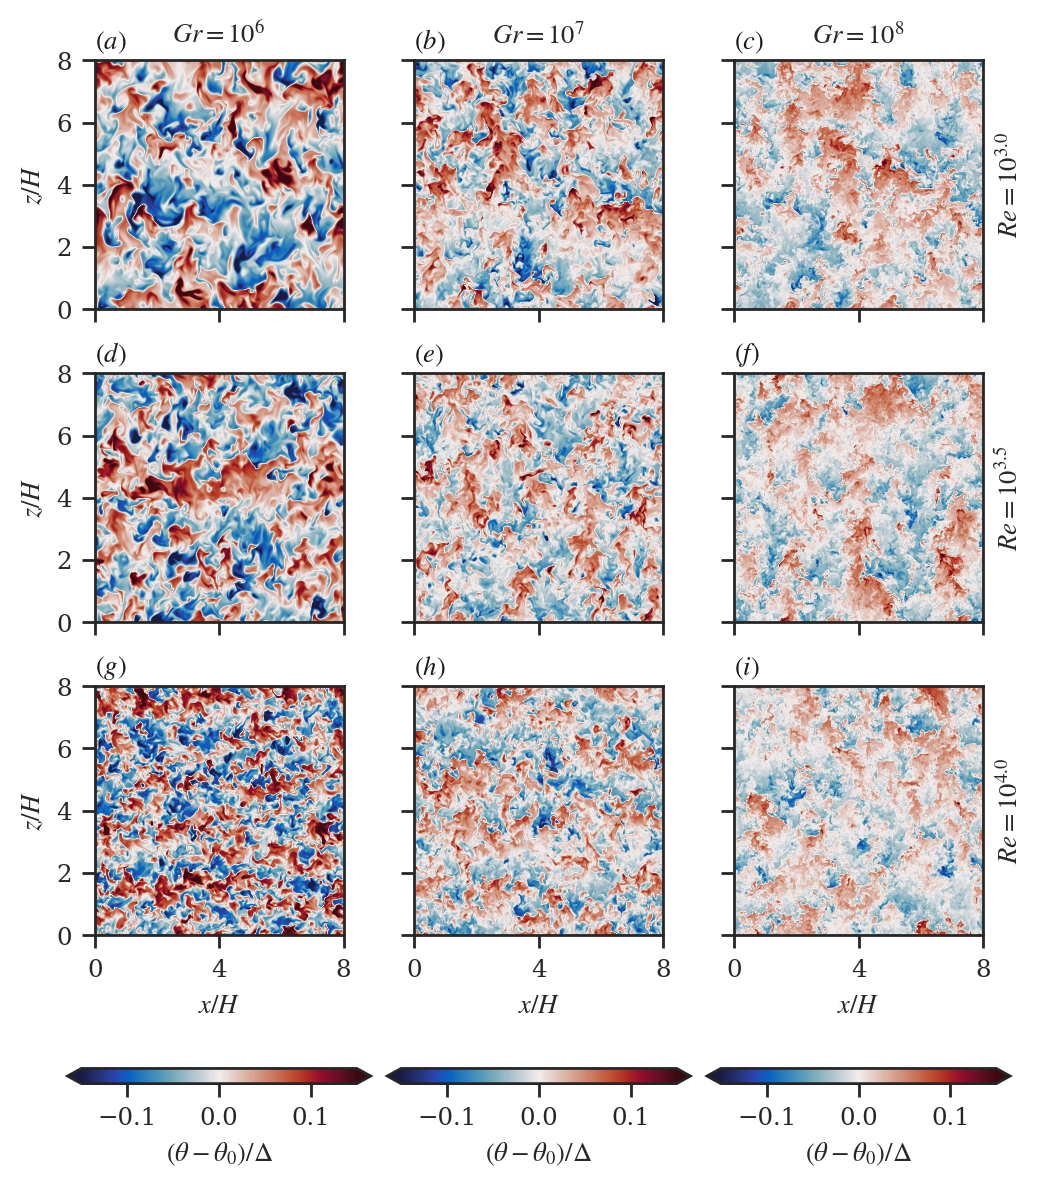

In [3]:
fig, axs = plt.subplots(
    3,3,
    figsize=(5.2,5.8), layout='constrained',
    sharex=True, sharey=True,
    dpi=200
)

# Set max dimensionless temperature perturbation
Tlim = 0.15

for i in range(3):
    for j in range(3):
        T = Tplanes[3*i + j]
        im = axs[j,i].imshow(T.T, extent=[0,8,0,8], origin='lower', vmin=-Tlim, vmax=Tlim, cmap='cmo.balance')
    fig.colorbar(im, ax=axs[:,i], orientation='horizontal', label='$(\\theta - \\theta_0)/\\Delta$', extend='both')
    
    # Add labels
    axs[-1,i].set_xlabel('$x/H$')
    axs[i,0].set_ylabel('$z/H$')
    axs[-1,i].set_xticks([0,4,8])
    axs[0,i].set_title('$Gr=10^%i$' % (i+6))
    axs[i,-1].annotate('$Re=10^{%.1f}$' % (3+0.5*i), (1.05, 0.5), rotation=90, ha='left', va='center', xycoords='axes fraction')

alph = 'abcdefghi'
for i, ax in enumerate(axs.flatten()):
    ax.annotate('$('+alph[i]+')$', (0.0,1.02), ha='left', va='bottom', xycoords='axes fraction', color='k')

# fig.savefig('midplanes.pdf', dpi=600)

plt.show()